<H1>CNN<H1>

C:\Users\ramav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.5450 - loss: 1.4453 - val_accuracy: 0.7070 - val_loss: 0.7669
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7559 - loss: 0.6613 - val_accuracy: 0.8270 - val_loss: 0.4899
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8243 - loss: 0.4835 - val_accuracy: 0.8400 - val_loss: 0.4342
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8460 - loss: 0.4548 - val_accuracy: 0.8610 - val_loss: 0.4143
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.8632 - loss: 0.3989 - val_accuracy: 0.8030 - val_loss: 0.4776
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8633 - loss: 0.3767 - val_accuracy: 0.8790 - val_loss: 0.3712
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8762 - loss: 0.3493 - val_accuracy: 0.8620 - val_loss: 0.4112
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.8838 - loss: 0.3240 - val_a

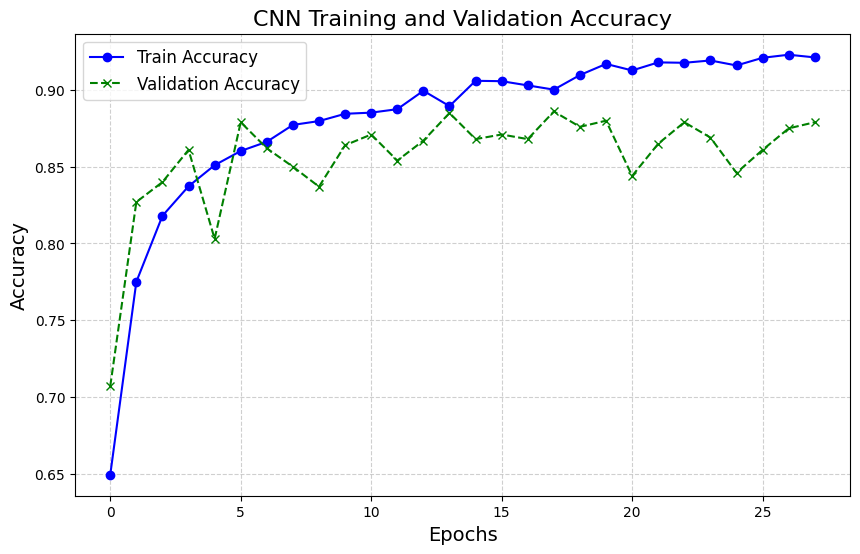

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
CNN Classification Report
              precision    recall  f1-score   support

      Broken       0.87      0.88      0.87       201
    Immature       0.90      0.90      0.90       225
      Intact       0.89      0.90      0.90       241
Skin-Damaged       0.89      0.88      0.89       226
     Spotted       0.85      0.85      0.85       107

    accuracy                           0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load extracted features from DenseNet
densenet_train_features, train_labels, densenet_test_features, test_labels = joblib.load('densenet_features.joblib')

# CNN-based Model Architecture using DenseNet Features
cnn_classifier = Sequential([
    Dense(1024, activation='relu', input_shape=(1024,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and model saving
cnn_checkpoint = ModelCheckpoint('cnn.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# Train the CNN model using DenseNet features
cnn_history = cnn_classifier.fit(
    densenet_train_features, train_labels,
    epochs=50,
    validation_data=(densenet_test_features, test_labels),
    callbacks=[cnn_checkpoint, early_stop]
)

# Plot CNN accuracy graphs
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--', marker='x')
plt.title('CNN Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Classification Report for CNN
cnn_predictions = cnn_classifier.predict(densenet_test_features)
cnn_pred_labels = cnn_predictions.argmax(axis=1)
print("CNN Classification Report")
print(classification_report(test_labels.argmax(axis=1), cnn_pred_labels, target_names=['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']))

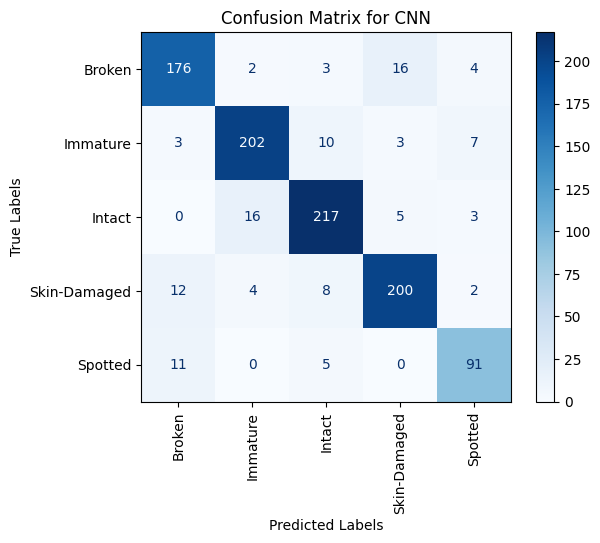

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for CNN predictions
conf_matrix_cnn = confusion_matrix(test_labels.argmax(axis=1), cnn_pred_labels)

# Define class names
class_names = ['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']

# Visualize the confusion matrix
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn, display_labels=class_names)
disp_cnn.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Add title and labels
plt.title("Confusion Matrix for CNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()